In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

/usr/local/lib/python2.7/site-packages/scipy/cluster/vq.py:78: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/site-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering


# Monty Hall Game

Let's assume we have the same game as in the movie. We have three doors, behind one door is $1.00. The other two doors have nothing behind them. The host of the game knows where the dollar is. After you choose one door, the host opens an empty door for you.

Build simulator to play N (make it 1000) rounds with each of the following strategies:

1. The stick to your guns strategy -- don't change doors with new information;
2. The "switch to the new door strategy" -- where you always switch to the last door once you get information from the host;

Compare the wealth accumulation under each strategy in a chart. Bonus points for doing this in less than 20 lines of code.

Part 2:

Simulate the same game under the assumption that it costs $0.50 to play. Try both strategies.

Is it worth playing this game?

Please submit the result as an html output from an Jupyter notebook.  Include a chart with the wealth accumulation for each strategy for both parts.

In [33]:
def iteration(swap):
    # generate 1 random number either 0, 1, or 2 
    correct_door = np.random.randint(3)
    selected_door = np.random.randint(3)
    # if you swap, unless you picked correct one in the first time, you will win. 
    if swap == True:
        if selected_door == correct_door:
            return 0
        else:
            return 1
    else:
        if selected_door == correct_door:
            return 1
        else:
            return 0    

In [63]:
df_part1 = pd.DataFrame(columns=["iteration", "always_swap", "never_swap"])
always_swap_total, never_swap_total = 0, 0
for i in range(0,1000):
    always_swap_total += iteration(True)
    never_swap_total += iteration(False)
    df_part1.loc[-1]=[i, always_swap_total, never_swap_total]
    df_part1.index=df_part1.index + 1 

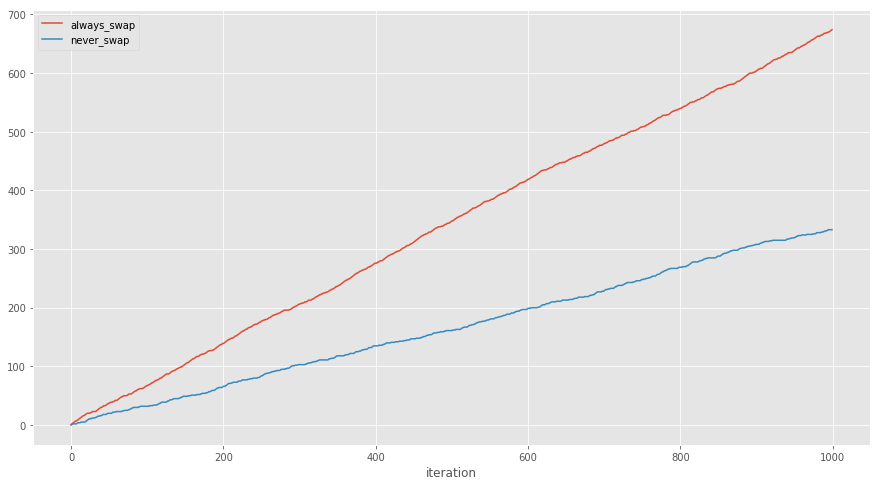

In [64]:
df_part1.plot(x='iteration');

The "switch to the new door strategy" is always the better

In [65]:
df_part2 = pd.DataFrame(columns=["iteration", "always_swap", "never_swap"])
always_swap_total, never_swap_total = 0, 0
cost = 0.5
for i in range(0,1000):
    always_swap_total += iteration(True) - cost
    never_swap_total += iteration(False) - cost
    df_part2.loc[-1]=[i, always_swap_total, never_swap_total]
    df_part2.index=df_part2.index + 1 

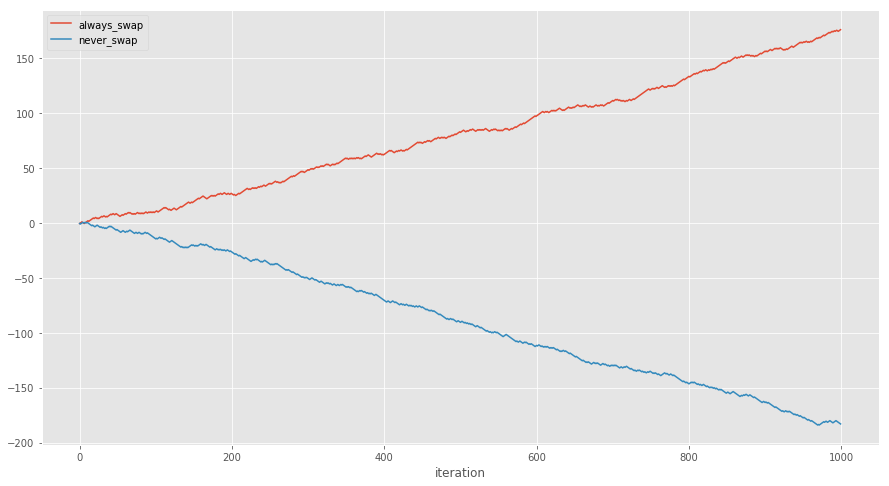

In [66]:
df_part2.plot(x='iteration');

Not worth playing if you stick to your first decision. However, if you choose to swap your first decesion, it's worth to try.